<a href="https://colab.research.google.com/github/Swann122/ML_codes/blob/main/Evaluation%20of%20KMeans%20clustering%20method%20on%20Digit%20dataset%20with%20and%20without%20PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import time
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [3]:
# Dataset Upload
digits = load_digits()
X = digits.data
y = digits.target

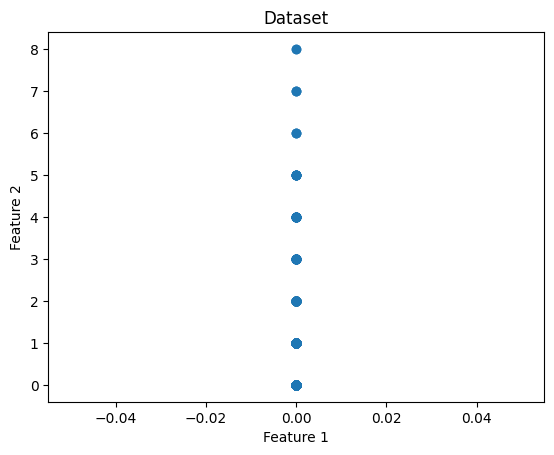

In [4]:
# Visualization of the Digit dataset
plt.scatter(X[:, 0], X[:, 1])
plt.title("Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
# It is a multidimentional dataset

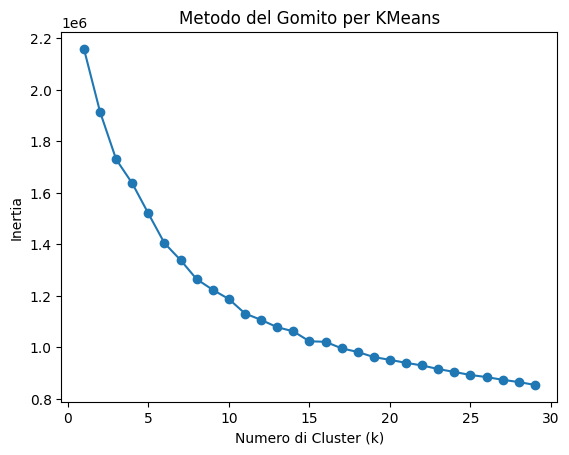

In [5]:
# Step 1: KMeans pre-PCA
# Finding the optimal number of clusters (elbow value)
inertia = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=11)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 30), inertia, marker='o')
plt.title('Metodo del Gomito per KMeans')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Inertia')
plt.show()
# k=10

In [10]:
# Standard KMeans evaluation function with metrics and timing:
def evaluate_kmeans(X, k):
    kmeans = KMeans(n_clusters=k, random_state=11)
    # Time interval calculation
    start_time = time.time()
    kmeans.fit(X)
    elapsed_time = time.time() - start_time

    # Metrics
    inertia = kmeans.inertia_  # An evaluation metric that measures how well a dataset has been clustered based on distance metrics.
    # Inertia is calculated by measuring the distance between a data point and its centroid, squaring the distance,
    # and summing those squares for each data point in the cluster.
    # The sum or inertial value represents the intra-cluster distance.
    # The lower the sum, the better, because it means the data points within the cluster are more compact or similar.

    silhouette = silhouette_score(X, kmeans.labels_)  # The silhouette score is a metric that measures the quality of a clustering.
    # It is a value between -1 and 1 that indicates how well a data point belongs to its cluster.
    # Values close to +1 indicate that samples are far from neighboring clusters.
    # A value of 0 indicates that samples are on or very close to the decision boundary between two clusters.
    # Negative values suggest that the samples might have been assigned to the wrong cluster.

    davies_bouldin = davies_bouldin_score(X, kmeans.labels_)  # A figure of merit that measures the quality of clustering algorithms.
    # It evaluates how compact and how well-separated the clusters are.

    return kmeans, elapsed_time, inertia, silhouette, davies_bouldin

In [11]:
# Valutazione del modello pre pca
kmeans_pre_pca, elapsed_time_pre_pca, inertia_pre_pca, silhouette_pre_pca, davies_bouldin_pre_pca = evaluate_kmeans(X, 10)


In [12]:
print(f"KMeans pre-PCA - Tempo di esecuzione: {elapsed_time_pre_pca:.3f} s") # Time to fit the KMean method
print(f"KMeans pre-PCA - Inertia: {inertia_pre_pca:.1f}")
print(f"KMeans pre-PCA - Silhouette Score: {silhouette_pre_pca:.3f}")
print(f"KMeans pre-PCA - Davies-Bouldin Index: {davies_bouldin_pre_pca:.3f}")

KMeans pre-PCA - Tempo di esecuzione: 0.015 s
KMeans pre-PCA - Inertia: 1187912.6
KMeans pre-PCA - Silhouette Score: 0.175
KMeans pre-PCA - Davies-Bouldin Index: 2.052


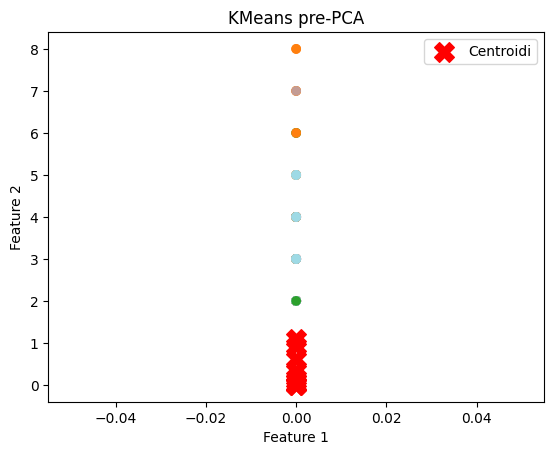

In [14]:
# I visualize the centroids found by KMeans but it's not very clear, PCA is needed.
plt.scatter(X[:, 0], X[:, 1], c=kmeans_pre_pca.labels_, cmap='tab20')
plt.scatter(kmeans_pre_pca.cluster_centers_[:, 0], kmeans_pre_pca.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroidi')
plt.title("KMeans pre-PCA")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [7]:
#Parte 2 : K-Means Post pca
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

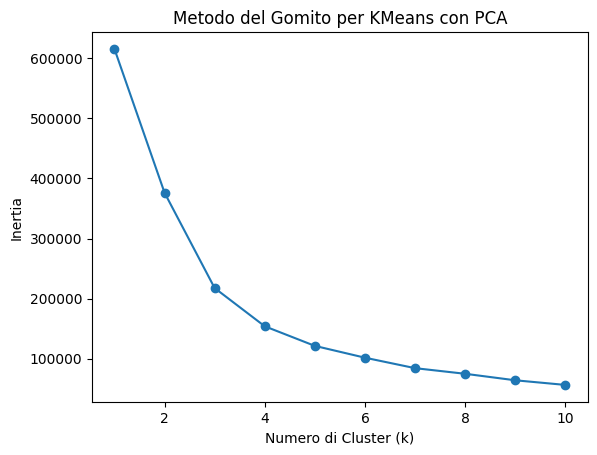

In [15]:
# Uso la regola del gomito
inertia_pca = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=11)
    kmeans.fit(X_pca)
    inertia_pca.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_pca, marker='o')
plt.title('Metodo del Gomito per KMeans con PCA')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Inertia')
plt.show()

In [16]:
# Figures of merit after PCA
kmeans_post_pca, elapsed_time_post_pca, inertia_post_pca, silhouette_post_pca, davies_bouldin_post_pca = evaluate_kmeans(X_pca, 10)
print(f"KMeans post-PCA - Tempo di esecuzione: {elapsed_time_post_pca:.3f} s")
print(f"KMeans post-PCA - Inertia: {inertia_post_pca:.1f}")
print(f"KMeans post-PCA - Silhouette Score: {silhouette_post_pca:.3f}")
print(f"KMeans post-PCA - Davies-Bouldin Index: {davies_bouldin_post_pca:.3f}")


KMeans post-PCA - Tempo di esecuzione: 0.014 s
KMeans post-PCA - Inertia: 56391.3
KMeans post-PCA - Silhouette Score: 0.396
KMeans post-PCA - Davies-Bouldin Index: 0.788


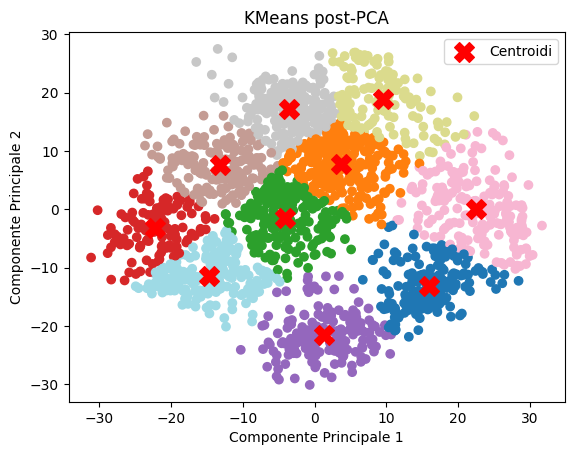

In [17]:
# Visualization of KMeans post-PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_post_pca.labels_, cmap='tab20')
plt.scatter(kmeans_post_pca.cluster_centers_[:, 0], kmeans_post_pca.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroidi')
plt.title("KMeans post-PCA")
plt.xlabel("Componente Principale 1")
plt.ylabel("Componente Principale 2")
plt.legend()
plt.show()

In [20]:
# Results Table
import pandas as pd

results = pd.DataFrame({
    'Metodo': ['KMeans pre-PCA', 'KMeans post-PCA'],
    'Tempo di esecuzione (s)': [elapsed_time_pre_pca, elapsed_time_post_pca],
    'Inertia': [inertia_pre_pca, inertia_post_pca],
    'Silhouette Score': [silhouette_pre_pca, silhouette_post_pca],
    'Davies-Bouldin Index': [davies_bouldin_pre_pca, davies_bouldin_post_pca]
})

"""
Metrics:

Inertia is an evaluation metric that measures how well a dataset
has been clustered based on distance metrics.
Inertia is calculated by measuring the distance between each data point
and its assigned centroid, squaring that distance, and summing the squares
for all points in the cluster. The total or inertial value is the intra-cluster distance.
The lower the sum, the better, as it means the data points
within the cluster are compact or more similar.

The silhouette score is a metric that measures the quality of a clustering,
that is, how well the data has been grouped. It is a value between -1 and 1
indicating how well a data point fits its assigned cluster.
Values close to +1 indicate that samples are far from neighboring clusters.
A value of 0 indicates that samples are on or very close to the decision boundary between two clusters.
Negative values suggest that the samples might have been assigned to the wrong cluster.

The Davies-Bouldin Index is a figure of merit that assesses the quality of clustering algorithms.
It measures how compact and how well-separated the clusters are.
This is an internal evaluation scheme, where the validation of how well the clustering
has been done is made using quantities and features inherent to the dataset.
This has a drawback that a good value reported by this method does not imply the
best information retrieval.
"""
results

,Metodo,Tempo di esecuzione (s),Inertia,Silhouette Score,Davies-Bouldin Index
0,KMeans pre-PCA,0.015321,1.187913e+06,0.175259,2.051730
1,KMeans post-PCA,0.014291,5.639132e+04,0.395989,0.788121
